Вариант 23
3.1. Используя таблицу значений $Y_i$  функции $y = f(x)$, вычисленных в точках $X_i, i = 1, ..., 3$   построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки ${X_i, Y_i}$.  Вычислить значение погрешности интерполяции в точке X*.

$f(x) = 1/x$

$X^* = 0,9$

a) $X = [0.1, 0.5, 0.9, 1.3]$

б) $X = [0.1, 0.5, 1.1, 1.3]$

In [150]:
import matplotlib.pyplot as plt
from math import factorial

In [151]:
def error (y_real, y_counted):
    return abs(abs(y_real) - abs(y_counted))

In [152]:
def f(x):
    return 1 / x
x_point = 0.8

In [153]:
def frange(start, stop, step):
    while start < stop:
        yield start
        start += step

In [154]:
Check = [x for x in frange(0.1, 1.5, 0.1)]

$ P_n (x) = \sum_{i=0}^{n} a_i  x^i $

$  P_n (x_i) = f_i $



### Лангранж

In [155]:
def omega(x_point, X):
    res = 1
    for x in X:
        res *= (x_point - x)
    return res

def omega1(x_i, X):
    res = 1
    for x in X:
        if x_i == x:
            continue
        res *= (x_i - x)
    return res

def lagarange(X, x_point, f):
    return sum([f(x) * omega(x_point, X) / (x_point - x)  / omega1(x, X) for x in X])
def L_i(X, Check, f):
    return [lagarange(X, x_point, f) for x_point in Check if x_point not in X]

In [156]:
def R(x_point, X, Check, f):
    return omega(x_point, X)* max(f(x)**(len(X)) for x in Check) /factorial(len(X))


#### a

Для одной точки

In [157]:
X = [0.1, 0.5, 0.9, 1.3]
Y = [f(x) for x in X]
y_counted_2 = lagarange(X[:3], x_point, f)
y_counted_3 = lagarange(X[:4], x_point, f)
print(y_counted_2)
print(y_counted_3)

0.6666666666666667
1.0256410256410255


Отрезок

In [158]:
Check = [x for x in Check if x not in X]

In [159]:
y_real = 1/x_point
print(y_real)

1.25


Ошибка 

In [160]:
print(error(1/x_point, y_counted_2))
print(error(1/x_point, y_counted_3))

0.5833333333333333
0.22435897435897445


Абсолютная Погрешность 

In [161]:
print(R(x_point, X[:3], Check, f))
print(R(x_point, X[:4],Check, f))

-0.4375
0.2734375


посчитали для одной точки, теперь посичтаем для "отрезка"

In [162]:
l_3 = L_i(X[:4], Check, f)
l_2 = L_i(X[:3], Check, f)

Без масштаба

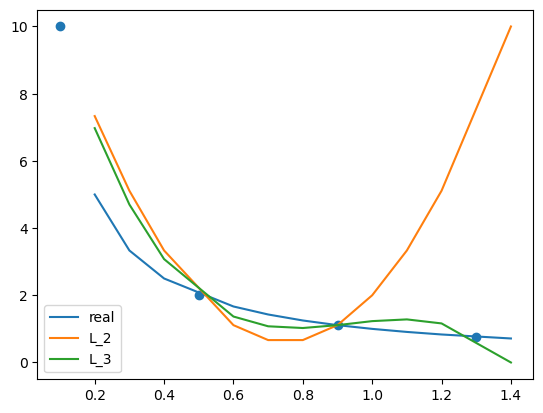

In [163]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

С масштабом

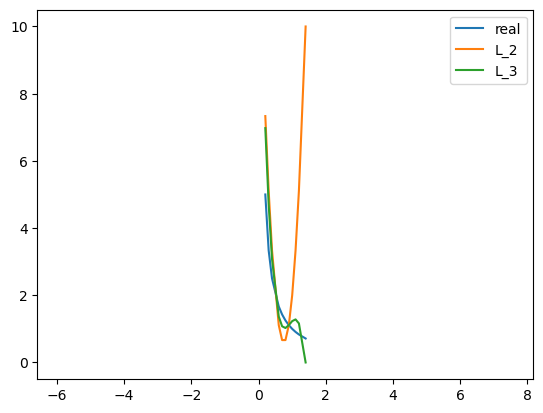

In [164]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.axis('equal')
plt.legend()
plt.show()

#### б

Для одной точки

In [165]:
X = [0.1, 0.5, 1.1, 1.3]
Y = [f(x) for x in X]
y_counted_2 = lagarange(X[:3], x_point, f)
y_counted_3 = lagarange(X[:4], x_point, f)
print(y_counted_2)
print(y_counted_3)

-0.1818181818181825
0.6993006993006989


Отрезок

In [166]:
Check = [x for x in Check if x not in X]

In [167]:
y_real = 1/x_point
print(y_real)

1.25


Ошибка

In [168]:
print(error(1/x_point, y_counted_2))
print(error(1/x_point, y_counted_3))

1.0681818181818175
0.5506993006993011


Абсолютная погрешность

In [169]:
print(R(x_point, X[:3], Check, f))
print(R(x_point, X[:4],Check, f))

-1.3125000000000007
0.8203125000000003


посчитали для одной точки, теперь посичтаем для "отрезка"

In [170]:
l_3 = L_i(X[:4], Check, f)
l_2 = L_i(X[:3], Check, f)

Без масштаба

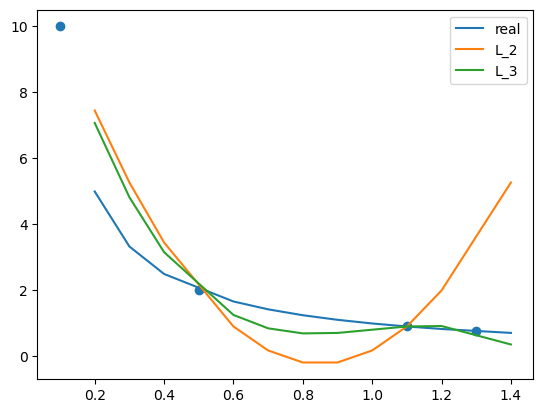

In [171]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

С масштабом

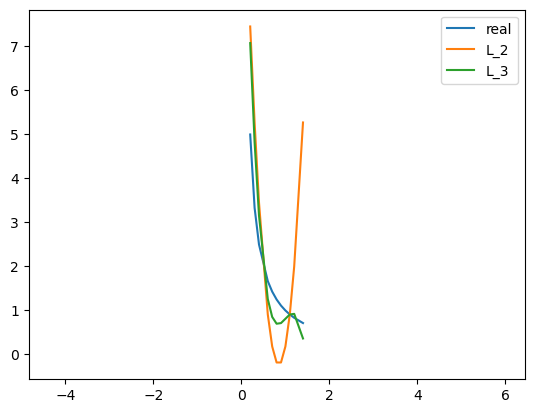

In [172]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.axis('equal')
plt.legend()
plt.show()

### Ньютон

In [173]:
def compute_difference_quotient(f, xi, xj):
    return (f(xi) - f(xj)) / (xi - xj)

def compute_divided_differences(f, X):
    n = len(X)
    if n == 1:
        return f(X[0])
    else:
        return (compute_divided_differences(f, X[1:]) - compute_divided_differences(f, X[:-1])) / (X[-1] - X[0])

def compute_Pn(f, X, x):
    n = len(X) - 1
    if n == 0:
        return f(X[0])
    else:
        term = 1
        for j in range(n):
            term *= (x - X[j])
        return (compute_Pn(f, X[:-1], x) +
                term * compute_divided_differences(f, X))
def P_n(f, X, Check):
    return [compute_Pn(f, X, x_point) for x_point in Check]


#### a

Для отрезка

In [174]:
X = [0.1, 0.5, 0.9, 1.3]
Y = [f(x) for x in X]
Check = [x for x in Check if x not in X]
y_counted_2 = compute_Pn(f, X[:3], x_point)
y_counted_3 = compute_Pn(f, X[:4], x_point)
print(y_counted_2)
print(y_counted_3)


0.6666666666666661
1.025641025641025


In [175]:
y_real = 1/x_point
print(y_real)

1.25


Ошибка

In [176]:
print(error(1/x_point, y_counted_2))
print(error(1/x_point, y_counted_3))

0.5833333333333339
0.2243589743589749


Абсолютная погрешность

In [177]:
print(R(x_point, X[:3], Check, f))
print(R(x_point, X[:4],Check, f))

-0.4375
0.2734375


посчитали для одной точки, теперь посичтаем для "отрезка"

In [178]:
p_2 = P_n(f, X[:3], Check)
p_3 = P_n(f, X[:4], Check)

Без масштаба

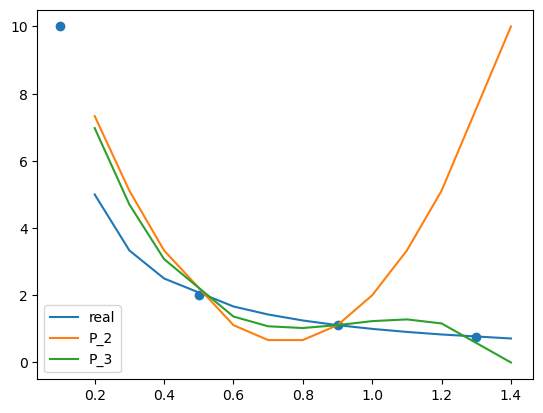

In [179]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

С масштабом

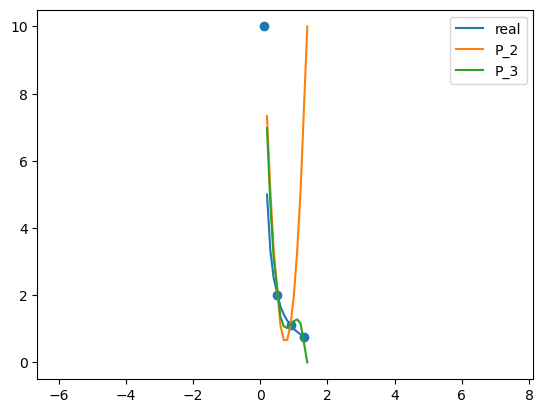

In [180]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)
plt.axis('equal')
plt.legend()
plt.show()

#### б

In [181]:
X = [0.1, 0.5, 1.1, 1.3]
Y = [f(x) for x in X]
Check = [x for x in Check if x not in X]
y_counted_2 = compute_Pn(f, X[:3], x_point)
y_counted_3 = compute_Pn(f, X[:4], x_point)
print(y_counted_2)
print(y_counted_3)

-0.18181818181818254
0.6993006993006993


In [182]:
y_real = 1/x_point
print(y_real)

1.25


In [183]:
print(error(1/x_point, y_counted_2))
print(error(1/x_point, y_counted_3))

1.0681818181818175
0.5506993006993007


In [184]:
print(R(x_point, X[:3], Check, f))
print(R(x_point, X[:4],Check, f))

-1.3125000000000007
0.8203125000000003


In [185]:
p_2 = P_n(f, X[:3], Check)
p_3 = P_n(f, X[:4], Check)

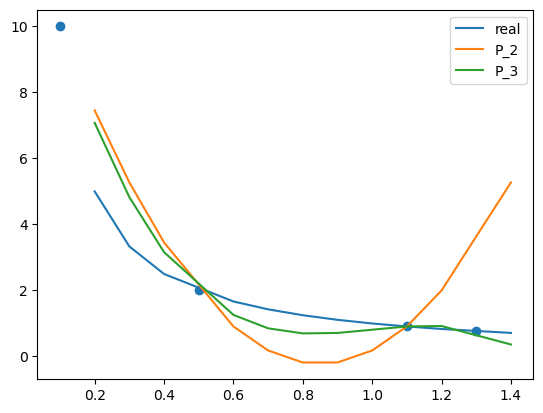

In [186]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

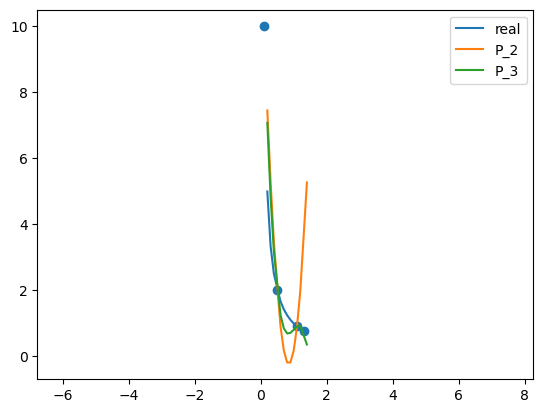

In [187]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)
plt.axis('equal')
plt.legend()
plt.show()